# Merge all PVI datasets

Unfortunatley, data from 2002 on PVI is unavailable, so Data is limited to 2004-2021

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
df109 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_109.csv")

In [3]:
df109 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_109.csv")

In [4]:
df110 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_110.csv")

In [5]:
df111 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_111.csv")

In [6]:
df112 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_112.csv")

In [7]:
df113 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_113.csv")

In [8]:
df114 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_114.csv")

In [9]:
df115 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_115.csv")

In [10]:
df116 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_116.csv")

In [11]:
df117 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_117.csv")

In [12]:
df = pd.concat([df109,df110,df111,df112,df113,df114,df115,df116,df117])

In [13]:
df
df["PVI"] = df["PVI"].str.replace("D+0","R+0")

In [14]:
import numpy as np
import plotnine as p9
from plotnine import ggplot, aes, facet_grid, labs, geom_point, geom_smooth
from sklearn.linear_model import LinearRegression as lm
import warnings
warnings.filterwarnings('ignore')

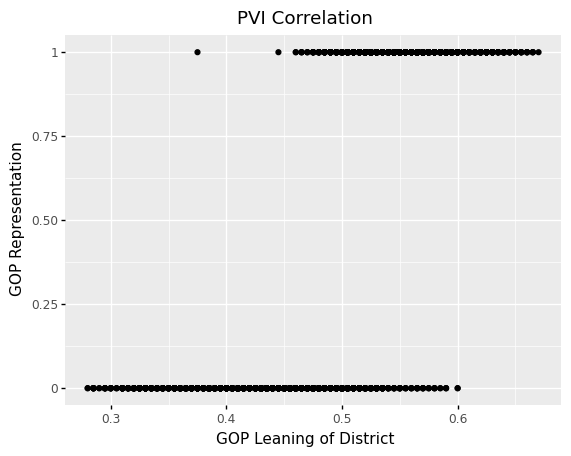

<ggplot: (8776948622758)>

In [15]:
# Create a super simple scatterplot to examine the relationship between PVI and congressional district
(p9.ggplot(data=df, mapping=p9.aes(x='metric', y='is_GOP'))
 + p9.geom_point() 
 + labs(x='GOP Leaning of District', y='GOP Representation',color="",title="PVI Correlation"))

In [16]:
#group by metric and average GOP seats
bm = df.groupby('metric').mean()
#this will not be produced into a dataset without aggregating all years, as 
bm = bm.reset_index()

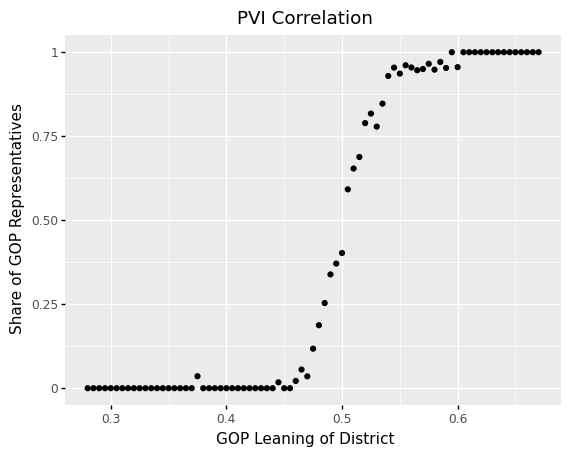

<ggplot: (8776948724953)>

In [17]:
#Plot averages
(p9.ggplot(data=bm, mapping=p9.aes(x='metric', y='is_GOP'))
 + p9.geom_point() 
 + labs(x='GOP Leaning of District', y="Share of GOP Representatives",color="",title="PVI Correlation"))

In [18]:
#now lets limit the data to only the R+10 to D+10 range, calling it Limited Domain
ld = bm[bm["metric"] <= .6]
ld = ld[ld["metric"] >= .4]

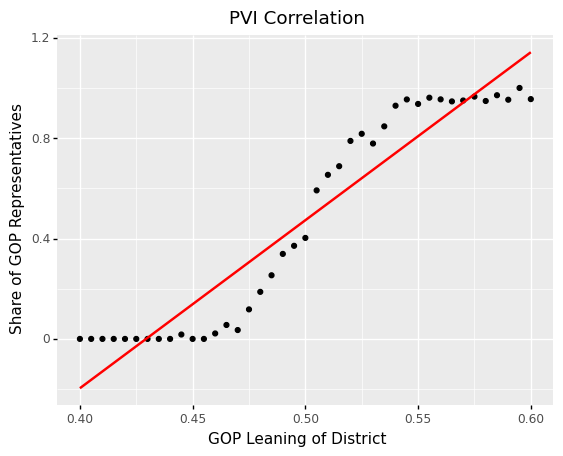

<ggplot: (8776939394127)>

In [19]:
#Plot averages
(p9.ggplot(data=ld, mapping=p9.aes(x='metric', y='is_GOP'))
 + p9.geom_point() 
 + geom_smooth(method = "lm", color = "red", se = False)
 + labs(x='GOP Leaning of District', y="Share of GOP Representatives",color="",title="PVI Correlation"))

Bins
- .37 and below is absolutley 0% Republican
- .375 to .46 is almost 0% Republican
- .465 and .47 are less than 10% Republican
- .475 to .525 is worth individualizing
- .53 and .535 are  75% to 85% Republican
- .54 to .60 are all 90% or more Republican
- .6 and beyond are only Republican

In [26]:
binned = df
binned["bin"] = pd.cut(binned['metric'], 
    [0, .37, .46, .47, .475, .48, .485, .49, .495, .5,
    .505, .51, .515, .52, .525, .535, .6, 1])
binned.bin = binned.bin.astype(str)

In [21]:
#generate text for a dictionary for the replacement of the bins

#dict_bin = pd.DataFrame(binned.bin.unique())
#dict_bin["pvi"] = ["R+8 to R+20", "R+4", "R+6 to R+7", ">R+20", "D+8 to D+25", "R+2", "R+1", "D+1", "EVEN", ">D+25","R+3","D+3","D+5","D+6 to D+7","D+5","D+2","D+4"]
#binned.bin = binned.bin.astype(str)
#dict_bin[0] = dict_bin[0].astype(str)
#dict_bin = dict_bin.rename(columns = {0:"bin","pvi":"range"})
#dict_col = "'" + dict_bin.bin + "'" + " " + ":" + " " + "'" + dict_bin.range + "'" + ","

In [27]:
bin_dict = {
'(0.535, 0.6]' : 'R+8 to R+20',
'(0.515, 0.52]' : 'R+4',
'(0.525, 0.535]' : 'R+6 to R+7',
'(0.6, 1.0]' : '>R+20',
'(0.37, 0.46]' : 'D+8 to D+25',
'(0.505, 0.51]' : 'R+2',
'(0.5, 0.505]' : 'R+1',
'(0.49, 0.495]' : 'D+1',
'(0.495, 0.5]' : 'EVEN',
'(0.0, 0.37]' : '>D+25',
'(0.51, 0.515]' : 'R+3',
'(0.48, 0.485]' : 'D+3',
'(0.47, 0.475]' : 'D+5',
'(0.52, 0.525]' : 'R+5',
'(0.46, 0.47]' : 'D+6 to D+7',
'(0.485, 0.49]' : 'D+2',
'(0.475, 0.48]' : 'D+4',
}

In [28]:
df = binned.replace({"bin":bin_dict})

In [29]:
#group by metric and average GOP seats
sort = df.groupby('bin').mean()
#this will not be produced into a dataset without aggregating all years, as 
sort = sort.reset_index()
sort

,bin,year,congress,is_GOP,metric
0,>D+25,2012.283951,113.141975,0.000000,0.338148
1,>R+20,2014.315271,114.157635,1.000000,0.626355
2,D+1,2011.774194,112.887097,0.370968,0.495000
3,D+2,2010.064516,112.032258,0.338710,0.490000
4,D+3,2010.816901,112.408451,0.253521,0.485000
5,D+4,2011.406250,112.703125,0.187500,0.480000
6,D+5,2011.411765,112.705882,0.117647,0.475000
7,D+6 to D+7,2012.050955,113.025478,0.044586,0.467707
8,D+8 to D+25,2011.853170,112.926585,0.004449,0.425890
9,EVEN,2010.780488,112.390244,0.402439,0.500000
